In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('train.csv')

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male',
       'age_was_missing', 'embarked_from_cherbourg',
       'embarked_from_queenstown', 'embarked_from_southampton'],
      dtype='object')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.Age.value_counts(dropna=False)

NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, Length: 89, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# df.Age.plot('hist')

In [8]:
df['male'] = df['Sex'].apply(lambda val: 1 if val =='male' else 0)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df['Sex_enc_le'] = le.fit_transform(df['Sex'])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Sex_enc_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [14]:
transfer = pd.get_dummies(df['Embarked'])

In [15]:
transfer.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
df['C'] = transfer['C']

In [17]:
df['Q'] = transfer['Q']

In [18]:
df['S'] = transfer['S']

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Sex_enc_le,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
male           891 non-null int64
Sex_enc_le     891 non-null int64
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(7), object(5), uint8(3)
memory usage: 100.1+ KB


In [21]:
import math

In [22]:
df['age_was_missing'] = df['Age'].apply(lambda x: 1 if math.isnan(x) else 0)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Sex_enc_le,C,Q,S,age_was_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,1,0


In [24]:
df1 = df[[
    'Pclass',
    'SibSp',
    'Parch',
#     'Fare',
    'Sex_enc_le',
    'C',
    'Q',
    'S',
    'age_was_missing'
]]

In [25]:
df1.head()

,Pclass,SibSp,Parch,Sex_enc_le,C,Q,S,age_was_missing
0,3,1,0,1,0,0,1,0
1,1,1,0,0,1,0,0,0
2,3,0,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0
4,3,0,0,1,0,0,1,0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass             891 non-null int64
SibSp              891 non-null int64
Parch              891 non-null int64
Sex_enc_le         891 non-null int64
C                  891 non-null uint8
Q                  891 non-null uint8
S                  891 non-null uint8
age_was_missing    891 non-null int64
dtypes: int64(5), uint8(3)
memory usage: 37.5 KB


In [27]:
df.Survived

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
target = to_categorical(df.Survived)

In [29]:
target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [30]:
predictors = df1.as_matrix()

/home/trantu/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [31]:
predictors

array([[3, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 1, 0],
       ...,
       [3, 1, 2, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 1, 0, 0]])

In [32]:
n_cols = df1.shape[1]

In [33]:
n_cols

8

In [34]:
early_stopping_monitor = EarlyStopping(patience=2)

In [35]:
model_1 = Sequential()

In [36]:
model_1.add(Dense(600, activation='relu', input_shape=(n_cols,)))

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
# model_1.add(Dense(800, activation='relu'))

In [38]:
# model_1.add(Dense(10, activation='relu'))

In [39]:
model_1.add(Dense(2, activation='softmax'))

In [40]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_1_training = model_1.fit(
    predictors, 
    target, 
    epochs=100, 
    validation_split=0.3, 
    callbacks=[early_stopping_monitor], 
    verbose=True)

Instructions for updating:
Use tf.cast instead.
Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 [==============================] - 0s 405us/step - loss: 0.6055 - acc: 0.6372 - val_loss: 0.5442 - val_acc: 0.7127
Epoch 2/100
623/623 [==============================] - 0s 62us/step - loss: 0.5398 - acc: 0.7592 - val_loss: 0.5019 - val_acc: 0.7836
Epoch 3/100
623/623 [==============================] - 0s 62us/step - loss: 0.5068 - acc: 0.7994 - val_loss: 0.4745 - val_acc: 0.7910
Epoch 4/100
623/623 [==============================] - 0s 69us/step - loss: 0.4851 - acc: 0.7961 - val_loss: 0.4640 - val_acc: 0.7910
Epoch 5/100
623/623 [==============================] - 0s 71us/step - loss: 0.4769 - acc: 0.7945 - val_loss: 0.4543 - val_acc: 0.8022
Epoch 6/100
623/623 [==============================] - 0s 77us/step - loss: 0.4678 - acc: 0.8026 - val_loss: 0.4737 - val_acc: 0.7799
Epoch 7/100
623/623 [==============================] - 0s 62us/step - loss: 0.4762 - acc: 0.7978 - va

In [42]:
model_2 = Sequential()

In [43]:
model_2.add(Dense(250, activation='relu', input_shape=(n_cols,)))

In [44]:
model_2.add(Dense(250, activation='relu'))

In [45]:
model_2.add(Dense(250, activation='relu'))

In [46]:
model_2.add(Dense(2, activation='softmax'))

In [47]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model_2_training = model_2.fit(
    predictors, 
    target, epochs=100, 
    validation_split=0.4, 
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 534 samples, validate on 357 samples
Epoch 1/100
534/534 [==============================] - 0s 773us/step - loss: 0.5723 - acc: 0.6948 - val_loss: 0.5278 - val_acc: 0.7815
Epoch 2/100
534/534 [==============================] - 0s 182us/step - loss: 0.5002 - acc: 0.7865 - val_loss: 0.4986 - val_acc: 0.7843
Epoch 3/100
534/534 [==============================] - 0s 174us/step - loss: 0.4860 - acc: 0.8052 - val_loss: 0.4790 - val_acc: 0.7843
Epoch 4/100
534/534 [==============================] - 0s 182us/step - loss: 0.4755 - acc: 0.8109 - val_loss: 0.4699 - val_acc: 0.7871
Epoch 5/100
534/534 [==============================] - 0s 176us/step - loss: 0.4672 - acc: 0.8034 - val_loss: 0.4635 - val_acc: 0.7759
Epoch 6/100
534/534 [==============================] - 0s 185us/step - loss: 0.4436 - acc: 0.8165 - val_loss: 0.4650 - val_acc: 0.7871
Epoch 7/100
534/534 [==============================] - 0s 162us/step - loss: 0.4359 - acc: 0.8202 - val_loss: 0.4563 - val_acc: 0.7927
Epoch 8/1

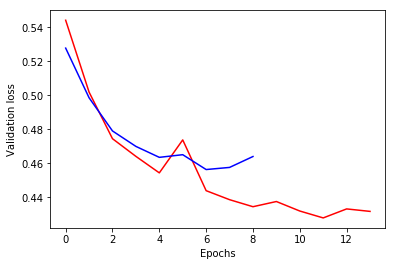

In [49]:
plt.plot(
    model_1_training.history['val_loss'],
    'r', 
    model_2_training.history['val_loss'], 
    'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

In [50]:
pred_data =  pd.read_csv('test.csv')

In [51]:
pred_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [53]:
pred_data['Sex_enc_le'] = le.fit_transform(pred_data['Sex'])

In [54]:
pred_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc_le
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [55]:
pred_data['age_was_missing'] = pred_data['Age'].apply(lambda x: 1 if math.isnan(x) else 0)

In [56]:
pred_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc_le,age_was_missing
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0


In [57]:
temp = pd.get_dummies(pred_data['Embarked'])

In [58]:
pred_data['C'] = temp['C']
pred_data['Q'] = temp['Q']
pred_data['S'] = temp['S']

In [59]:
pred_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc_le,age_was_missing,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,0,1


In [60]:
pred_data1 = pred_data[[
    'Pclass',
    'SibSp',
    'Parch',
#     'Fare',
    'Sex_enc_le',
    'C',
    'Q',
    'S',
    'age_was_missing'
]].as_matrix()

/home/trantu/miniconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [61]:
pred_data1

array([[3, 0, 0, ..., 1, 0, 0],
       [3, 1, 0, ..., 0, 1, 0],
       [2, 0, 0, ..., 1, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 1, 0],
       [3, 0, 0, ..., 0, 1, 1],
       [3, 1, 1, ..., 0, 0, 1]])

In [62]:
predictions = model_1.predict(pred_data1)

In [67]:
predictions

array([[0.8291115 , 0.17088851],
       [0.41487035, 0.5851296 ],
       [0.76402056, 0.23597942],
       [0.87141556, 0.12858443],
       [0.34558496, 0.654415  ],
       [0.87141556, 0.12858443],
       [0.17327322, 0.8267268 ],
       [0.66854846, 0.33145157],
       [0.2864271 , 0.7135728 ],
       [0.904726  , 0.09527393],
       [0.9261469 , 0.0738531 ],
       [0.6306017 , 0.36939836],
       [0.09529588, 0.9047041 ],
       [0.7934428 , 0.20655724],
       [0.09529588, 0.9047041 ],
       [0.10744064, 0.8925594 ],
       [0.76402056, 0.23597942],
       [0.84784   , 0.15215996],
       [0.41487035, 0.5851296 ],
       [0.2864271 , 0.7135728 ],
       [0.51507413, 0.4849258 ],
       [0.82298815, 0.17701182],
       [0.11698268, 0.8830173 ],
       [0.6065206 , 0.3934794 ],
       [0.104887  , 0.895113  ],
       [0.8866484 , 0.11335161],
       [0.06757598, 0.93242407],
       [0.84784   , 0.15215996],
       [0.6306017 , 0.36939836],
       [0.8488188 , 0.15118119],
       [0.

In [68]:
predicted_prob_true = predictions[:, 1]

In [69]:
predicted_prob_true

array([0.17088851, 0.5851296 , 0.23597942, 0.12858443, 0.654415  ,
       0.12858443, 0.8267268 , 0.33145157, 0.7135728 , 0.09527393,
       0.0738531 , 0.36939836, 0.9047041 , 0.20655724, 0.9047041 ,
       0.8925594 , 0.23597942, 0.15215996, 0.5851296 , 0.7135728 ,
       0.4849258 , 0.17701182, 0.8830173 , 0.3934794 , 0.895113  ,
       0.11335161, 0.93242407, 0.15215996, 0.36939836, 0.15118119,
       0.20655724, 0.18324417, 0.6608554 , 0.55423874, 0.4849258 ,
       0.15215996, 0.5584055 , 0.6203507 , 0.12858443, 0.0738531 ,
       0.20218366, 0.2753644 , 0.12858443, 0.8116876 , 0.9047041 ,
       0.12858443, 0.29836586, 0.11577714, 0.9256525 , 0.70507884,
       0.3909944 , 0.2160431 , 0.71958303, 0.7761616 , 0.1524035 ,
       0.08005557, 0.12858443, 0.12858443, 0.07682931, 0.9256525 ,
       0.12858443, 0.20789874, 0.12858443, 0.8267268 , 0.64725876,
       0.7599309 , 0.8267268 , 0.36939836, 0.29836586, 0.7069206 ,
       0.8267268 , 0.12858443, 0.6203507 , 0.29836586, 0.92565

In [65]:
predicted_prob_true = predicted_prob_true > 0.8

In [66]:
predicted_prob_true

array([False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,

In [ ]:
predicted_prob_true = predicted_prob_true.astype(int)

In [ ]:
predicted_prob_pd = pd.DataFrame({'Survived':predicted_prob_true})

In [ ]:
predicted_prob_pd

In [ ]:
pred_data['Survived'] = predicted_prob_pd['Survived']

In [ ]:
pred_data.head()

In [ ]:
pred_data[['PassengerId', 'Survived']].to_csv('submit.csv',index=False)